## `Task` Do feature selection as per metods taught is session 54 on SECOM dataset.

Dataset Link : https://archive.ics.uci.edu/ml/datasets/SECOM

Drive Link : https://docs.google.com/spreadsheets/d/1dFCe1zgokabsiEr6BbWmMJtiMefkrChpJWLiG_0dDkk/edit?usp=share_link

In [28]:
# Write your Code here

### `Solution`

In [29]:
import pandas as pd

data = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQtBXo5cBnDsM2fmfHPm6u72KGUS5FjPHNGMxOfYjA9-CAhmnRpwkIw_rOR3sANJIToiUU__6fbBvig/pub?gid=572763137&single=true&output=csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [30]:
data.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [31]:
data.shape

(1567, 592)

In [32]:
data.iloc[:, -1].value_counts()

Pass/Fail
-1    1463
 1     104
Name: count, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score

X = data.drop('Pass/Fail', axis=1)
y = data['Pass/Fail']

In [34]:
X.drop(columns='Time', inplace=True, axis=1)

In [35]:
X.isnull().sum()

0       6
1       7
2      14
3      14
4      14
       ..
585     1
586     1
587     1
588     1
589     1
Length: 590, dtype: int64

In [36]:
cols_with_high_nan = X.isnull().sum()[X.isnull().sum() > 500].index
cols_with_high_nan

Index(['72', '73', '85', '109', '110', '111', '112', '157', '158', '220',
       '244', '245', '246', '247', '292', '293', '345', '346', '358', '382',
       '383', '384', '385', '492', '516', '517', '518', '519', '578', '579',
       '580', '581'],
      dtype='object')

In [37]:
X.drop(columns=cols_with_high_nan, axis=1, inplace=True)

In [38]:
X.isnull().sum()

0       6
1       7
2      14
3      14
4      14
       ..
585     1
586     1
587     1
588     1
589     1
Length: 558, dtype: int64

In [39]:
X.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '576', '577', '582', '583', '584', '585', '586', '587', '588', '589'],
      dtype='object', length=558)

In [40]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # You can use 'median' or 'constant'
X_imputed = imputer.fit_transform(X)

In [41]:
X_imputed.shape

(1567, 558)

In [42]:
type(X_imputed)

numpy.ndarray

In [43]:
X = pd.DataFrame(X_imputed, columns=X.columns)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(1253, 558)
(314, 558)


### Scaling the dataset

In [45]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
type(X_train_scaled)

numpy.ndarray

In [47]:
X_train = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)

## Applying Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)

baseline_log_reg_score = accuracy_score(y_test, y_pred)
baseline_log_reg_score

0.8821656050955414

## 1. Remove Duplicate Columns

In [49]:
def get_duplicate_columns(df):
    duplicate_columns = {}
    seen_columns = {}
    
    for column in df.columns:
        current_column = df[column]
        
        # Convert column data to bytes
        try:
            current_column_hash = current_column.tobytes()
        except AttributeError:
            current_column_hash = current_column.to_string().encode()
            
        if current_column_hash in seen_columns:
            if seen_columns[current_column_hash] in duplicate_columns:
                duplicate_columns[seen_columns[current_column_hash]].append(column)
            else:
                duplicate_columns[seen_columns[current_column_hash]] = [column]
        else:
            seen_columns[current_column_hash] = column
    
    return duplicate_columns

In [51]:
duplicated_columns = get_duplicate_columns(X_train)
duplicated_columns

{'5': ['13',
  '42',
  '49',
  '52',
  '69',
  '97',
  '141',
  '149',
  '178',
  '179',
  '186',
  '189',
  '190',
  '191',
  '192',
  '193',
  '194',
  '226',
  '229',
  '230',
  '231',
  '232',
  '233',
  '234',
  '235',
  '236',
  '237',
  '240',
  '241',
  '242',
  '243',
  '256',
  '257',
  '258',
  '259',
  '260',
  '261',
  '262',
  '263',
  '264',
  '265',
  '266',
  '276',
  '284',
  '313',
  '314',
  '315',
  '322',
  '325',
  '326',
  '327',
  '328',
  '329',
  '330',
  '364',
  '369',
  '370',
  '371',
  '372',
  '373',
  '374',
  '375',
  '378',
  '379',
  '380',
  '381',
  '394',
  '395',
  '396',
  '397',
  '398',
  '399',
  '400',
  '401',
  '402',
  '403',
  '404',
  '414',
  '422',
  '449',
  '450',
  '451',
  '458',
  '461',
  '462',
  '463',
  '464',
  '465',
  '466',
  '481',
  '498',
  '501',
  '502',
  '503',
  '504',
  '505',
  '506',
  '507',
  '508',
  '509',
  '512',
  '513',
  '514',
  '515',
  '528',
  '529',
  '530',
  '531',
  '532',
  '533',
  '534',
  

In [55]:
X_train.loc[:, ['74', '206']]

,74,206
0,-0.02837,-0.02837
1,-0.02837,-0.02837
2,-0.02837,-0.02837
3,-0.02837,-0.02837
4,-0.02837,-0.02837
...,...,...
1248,-0.02837,-0.02837
1249,-0.02837,-0.02837
1250,-0.02837,-0.02837
1251,-0.02837,-0.02837


In [57]:
X_train.loc[:, ['537', '538']]

,537,538
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
1248,0.0,0.0
1249,0.0,0.0
1250,0.0,0.0
1251,0.0,0.0


In [59]:
len(X_train)

1253

In [62]:
(X_train['537'] == X_train['538']).sum()

1253

In [64]:
for one_list in duplicated_columns.values():
    X_train.drop(columns=one_list, inplace=True)
    X_test.drop(columns=one_list, inplace=True)

In [65]:
X_train.shape

(1253, 438)

In [91]:
558 - 438

120

## 2. Variance Threshold

In [72]:
# Threshold value guideline
# Make sure all the columns are on the same scale, standardize or normalize
# When on the same scale, value can be set between 0.1 to 0.01

from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=0.1)

sel.fit(X_train)

VarianceThreshold(threshold=0.1)

In [73]:
# Columns which are more than threshold value
sum(sel.get_support())

437

In [74]:
# All these columns
columns = X_train.columns[sel.get_support()]
columns

Index(['0', '1', '2', '3', '4', '6', '7', '8', '9', '10',
       ...
       '576', '577', '582', '583', '584', '585', '586', '587', '588', '589'],
      dtype='object', length=437)

In [75]:
# Transform will delete all those columns who are below the threshold

X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

print(X_train.shape)
print(X_test.shape)

(1253, 437)
(314, 437)


## 3. Correlation

<Axes: >

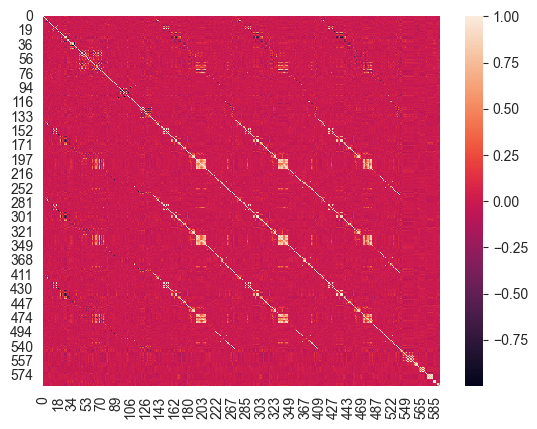

In [76]:
# We are applying brute force approach where we are finding the corr of every feature with all other features
# If it is more than 0.95, then keep only one col and drop the rest

import seaborn as sns

# Dark regions are all high positive corr
sns.heatmap(X_train.corr())

In [77]:
corr_matrix = X_train.corr()
corr_matrix

,0,1,2,3,4,6,7,8,9,10,...,576,577,582,583,584,585,586,587,588,589
0,1.000000,-0.143680,0.011555,0.003914,-0.012802,-0.006775,0.035262,-0.058239,0.001004,-0.002951,...,0.015361,0.016619,-0.011406,0.022527,0.019423,0.022836,0.014943,-0.042926,-0.043463,-0.000625
1,-0.143680,1.000000,0.010430,-0.024483,-0.002612,-0.014374,-0.013836,0.042906,0.027468,0.012000,...,0.016361,0.003295,0.044103,0.000291,-0.002369,-0.000229,-0.004159,0.022830,0.017696,0.049031
2,0.011555,0.010430,1.000000,0.292022,0.106731,-0.142273,-0.140102,0.016621,0.019187,0.052057,...,0.008221,-0.024629,-0.010622,0.016476,0.018930,0.016605,-0.044695,-0.011731,-0.019067,-0.027925
3,0.003914,-0.024483,0.292022,1.000000,-0.065630,-0.675214,0.075457,-0.088596,0.058361,0.060999,...,0.019722,0.038215,0.003635,0.028913,0.027503,0.029625,0.015701,-0.032527,-0.024909,-0.075410
4,-0.012802,-0.002612,0.106731,-0.065630,1.000000,-0.084024,-0.348672,-0.028429,0.060492,-0.008246,...,-0.013885,-0.004937,0.052852,-0.001827,-0.002189,-0.002153,-0.048659,-0.034726,-0.029114,0.056267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,0.022836,-0.000229,0.016605,0.029625,-0.002153,-0.044517,0.011812,0.025262,-0.037822,0.039163,...,-0.023465,-0.035356,-0.227918,0.999910,0.996194,1.000000,0.007184,-0.004953,-0.004131,-0.009151
586,0.014943,-0.004159,-0.044695,0.015701,-0.048659,-0.008861,0.064400,0.012063,0.039907,0.008114,...,-0.037968,-0.022384,-0.024021,0.006772,0.005188,0.007184,1.000000,0.173652,0.171242,-0.496121
587,-0.042926,0.022830,-0.011731,-0.032527,-0.034726,0.045694,-0.025263,0.040535,0.051616,0.070055,...,-0.014171,-0.031236,0.001659,-0.004498,-0.004173,-0.004953,0.173652,1.000000,0.973403,0.370821
588,-0.043463,0.017696,-0.019067,-0.024909,-0.029114,0.044846,-0.023988,0.040127,0.057859,0.069009,...,-0.024754,-0.035971,0.004202,-0.003702,-0.003245,-0.004131,0.171242,0.973403,1.000000,0.373411


In [78]:
# get the column names of the DataFrame
columns = corr_matrix.columns

# Create an empty list to keep track of columns to drop
columns_to_drop = []

for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        # Access the cell of the DataFrame
        if corr_matrix.loc[columns[i], columns[j]] > 0.95:
            columns_to_drop.append(columns[j])
            
# Repetitive cols
print(len(columns_to_drop))

252


In [79]:
columns_to_drop

['140',
 '275',
 '148',
 '152',
 '283',
 '287',
 '421',
 '27',
 '249',
 '387',
 '127',
 '408',
 '271',
 '409',
 '272',
 '410',
 '411',
 '274',
 '275',
 '277',
 '415',
 '416',
 '279',
 '417',
 '280',
 '281',
 '282',
 '420',
 '152',
 '154',
 '283',
 '287',
 '289',
 '421',
 '425',
 '427',
 '285',
 '286',
 '424',
 '283',
 '287',
 '421',
 '425',
 '288',
 '426',
 '289',
 '421',
 '427',
 '290',
 '428',
 '291',
 '429',
 '294',
 '295',
 '296',
 '297',
 '298',
 '165',
 '299',
 '300',
 '299',
 '300',
 '301',
 '437',
 '302',
 '303',
 '304',
 '440',
 '305',
 '441',
 '306',
 '442',
 '174',
 '307',
 '309',
 '443',
 '445',
 '308',
 '444',
 '307',
 '309',
 '443',
 '445',
 '310',
 '446',
 '311',
 '447',
 '312',
 '448',
 '452',
 '317',
 '453',
 '318',
 '454',
 '319',
 '455',
 '320',
 '456',
 '321',
 '457',
 '323',
 '459',
 '324',
 '467',
 '332',
 '333',
 '469',
 '334',
 '470',
 '335',
 '338',
 '339',
 '475',
 '340',
 '341',
 '477',
 '343',
 '479',
 '344',
 '348',
 '349',
 '350',
 '351',
 '352',
 '353',
 

In [80]:
columns_to_drop = set(columns_to_drop)
len(columns_to_drop)

164

In [81]:
X_train.drop(columns=columns_to_drop, axis=1, inplace=True)
X_test.drop(columns=columns_to_drop, axis=1, inplace=True)

X_train.shape

(1253, 273)

In [82]:
# We started of from 592 
# Removed duplicates, and we were left with 438
# Applied Variance Threshold and we got 437 remaining
# Applied corr, and we are not left with 273

## 4. ANOVA

In [83]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

sel = SelectKBest(f_classif, k=100).fit(X_train, y_train)

# Display selected feature names
X_train.columns[sel.get_support()]

Index(['0', '10', '11', '14', '17', '21', '22', '25', '26', '28', '32', '33',
       '37', '38', '40', '56', '58', '59', '61', '62', '63', '64', '65', '66',
       '67', '70', '76', '79', '87', '89', '90', '95', '99', '100', '103',
       '104', '114', '121', '122', '123', '124', '125', '126', '129', '130',
       '133', '138', '144', '145', '146', '159', '160', '163', '164', '175',
       '180', '181', '183', '188', '195', '196', '197', '198', '199', '200',
       '203', '204', '205', '207', '210', '213', '215', '222', '225', '227',
       '238', '316', '331', '336', '337', '418', '423', '430', '431', '433',
       '434', '460', '468', '471', '484', '488', '510', '511', '521', '542',
       '543', '550', '551', '559', '573'],
      dtype='object')

In [85]:
columns = X_train.columns[sel.get_support()]

X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

print(X_train.shape)
print(X_test.shape)

(1253, 100)
(314, 100)


# Moment of Truth

In [86]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

baseline_log_reg_score = accuracy_score(y_test, y_pred)
baseline_log_reg_score

0.8980891719745223